In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import shutil
import sklearn.model_selection as model_selection

from google.colab import drive
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/BMI260/BMI260_project')
PATH_TO_DATA = "MRNet-v1.0"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [15]:
len(os.listdir("MRNet-v1.0/test/axial"))

120

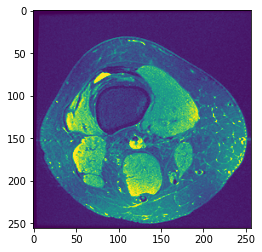

In [ ]:
# Test loading image
PATH_TO_AXIAL = os.path.join(PATH_TO_DATA, "train_original", "axial")
df = np.load(os.path.join(PATH_TO_AXIAL, "0000.npy"))
plt.imshow(df[0, :, :])

In [ ]:
os.chdir("/content/drive/MyDrive/BMI260/BMI260_project")

In [ ]:
# Set X as array of axial, saggital, coronal paths for each patient
X = pd.DataFrame(np.zeros((1130, 3)), columns=["axial", "sagittal", "coronal"], dtype=object)
axial_scans = sorted(os.listdir("MRNet-v1.0/train_original/axial"))
sagittal_scans = sorted(os.listdir("MRNet-v1.0/train_original/sagittal"))
coronal_scans = sorted(os.listdir("MRNet-v1.0/train_original/coronal"))
for i in range(1130):
  X.loc[i]["axial"] = os.path.join("MRNet-v1.0/train_original/axial", axial_scans[i])
  X.loc[i]["sagittal"] = os.path.join("MRNet-v1.0/train_original/sagittal",sagittal_scans[i])
  X.loc[i]["coronal"] = os.path.join("MRNet-v1.0/train_original/coronal", coronal_scans[i])
        
# # Set y as labels, abnormal, ACL tear, meniscal tear
# y = pd.Series(np.zeros((1130)), dtype=object)
y = []
#abnormal_labels = pd.read_csv("MRNet-v1.0/train-abnormal.csv", index_col=0, header=None)
acl_labels = pd.read_csv("MRNet-v1.0/train-acl.csv", index_col=0, header=None)
#meniscus_labels = pd.read_csv("MRNet-v1.0/train-meniscus.csv", index_col=0, header=None)
for i in range(1130):
  y.append(acl_labels.loc[i][1])
  # y.loc[i]["abnormal"] = abnormal_labels.loc[i][1]
  # y[i] = acl_labels.loc[i][1]
  # y.loc[i]["meniscus"] = meniscus_labels.loc[i][1]
y = np.array(y)

X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
      X, 
      y, 
      test_size = .20,
      random_state = 10
    )
# X_train, X_valid, y_train, y_valid

In [ ]:
X_train

,axial,sagittal,coronal
78,MRNet-v1.0/train_original/axial/0078.npy,MRNet-v1.0/train_original/sagittal/0078.npy,MRNet-v1.0/train_original/coronal/0078.npy
815,MRNet-v1.0/train_original/axial/0815.npy,MRNet-v1.0/train_original/sagittal/0815.npy,MRNet-v1.0/train_original/coronal/0815.npy
758,MRNet-v1.0/train_original/axial/0758.npy,MRNet-v1.0/train_original/sagittal/0758.npy,MRNet-v1.0/train_original/coronal/0758.npy
271,MRNet-v1.0/train_original/axial/0271.npy,MRNet-v1.0/train_original/sagittal/0271.npy,MRNet-v1.0/train_original/coronal/0271.npy
143,MRNet-v1.0/train_original/axial/0143.npy,MRNet-v1.0/train_original/sagittal/0143.npy,MRNet-v1.0/train_original/coronal/0143.npy
...,...,...,...
256,MRNet-v1.0/train_original/axial/0256.npy,MRNet-v1.0/train_original/sagittal/0256.npy,MRNet-v1.0/train_original/coronal/0256.npy
1097,MRNet-v1.0/train_original/axial/1097.npy,MRNet-v1.0/train_original/sagittal/1097.npy,MRNet-v1.0/train_original/coronal/1097.npy
1032,MRNet-v1.0/train_original/axial/1032.npy,MRNet-v1.0/train_original/sagittal/1032.npy,MRNet-v1.0/train_original/coronal/1032.npy
733,MRNet-v1.0/train_original/axial/0733.npy,MRNet-v1.0/train_original/sagittal/0733.npy,MRNet-v1.0/train_original/coronal/0733.npy


In [ ]:
for _,row in X_train.iterrows():
  source = f"{row.axial}"
  destination = f"{row.axial}".replace("train_original", "train")
  shutil.copy(source, destination)

In [ ]:
len(os.listdir("MRNet-v1.0/train/axial"))

904

In [ ]:
for _,row in X_train.iterrows():
  source = f"{row.sagittal}"
  destination = f"{row.sagittal}".replace("train_original", "train")
  shutil.copy(source, destination)

In [ ]:
len(os.listdir("MRNet-v1.0/train/sagittal"))

904

In [ ]:
for _,row in X_train.iterrows():
  source = f"{row.coronal}"
  destination = f"{row.coronal}".replace("train_original", "train")
  shutil.copy(source, destination)

In [ ]:
len(os.listdir("MRNet-v1.0/train/coronal"))

904

In [ ]:
for _,row in X_valid.iterrows():
  source = f"{row.axial}"
  destination = f"{row.axial}".replace("train_original", "valid")
  shutil.copy(source, destination)

In [ ]:
len(os.listdir("MRNet-v1.0/valid/axial"))

226

In [ ]:
for _,row in X_valid.iterrows():
  source = f"{row.sagittal}"
  destination = f"{row.sagittal}".replace("train_original", "valid")
  shutil.copy(source, destination)

In [ ]:
len(os.listdir("MRNet-v1.0/valid/sagittal"))

226

In [ ]:
for _,row in X_valid.iterrows():
  source = f"{row.coronal}"
  destination = f"{row.coronal}".replace("train_original", "valid")
  shutil.copy(source, destination)

In [ ]:
len(os.listdir("MRNet-v1.0/valid/coronal"))

226